## This Notebook will aim to Optimize linear Models

I have a lot of different automatic results in the previous notebook so just manually take most optimal features and reduce from there



## Start with Naive Bayes


'avg3Months_Loan', 'avg3Months_DebtCollection', 'avg6Months_Loan', 'avg6Months_Gambling', 'avg_Gambling', 'avg_Salary', 'avg3Months_Deposit', 'avg3Months_Gambling','avg_Loan', 'avg_HousingCost', 'avg3Months_CashWithdrawal' ,'avg6Months_DirectDebit', 'avg_Gaming', 'avg3Months_Gaming', 'avg_CashWithdrawal', 'avg_OtherIncome', 'avg6Months_CashWithdrawal', 'avg6Months_InstallmentPayment', 'avg_DirectDebit', 'avg6Months_HousingCost', 'avg6Months_Gaming', 'avg3Months_DirectDebit'
'count_Loan', 'trend_DebtCollection', 'sum_Loan', 'trend_Deposit', 'sum_Gambling', 'count_Gambling', 'sum_Salary', 'trend_CashWithdrawal', 'sum_DirectDebit',

'sum installmentPayments', 'trend_Loan', 'Gambling_sum9Months', 'MoneyRemittance_monthlyAvg','trend_Salary', 'MoneyRemittance_partOfSalary9Months', 'Gambling_sum12Months', 'trend_MoneyRemittance', 'Crypto_count3Months', 'trend_OtherIncome', 'trend_PassiveIncome', 'Gambling_count9Months', 'Gambling_partOfSalary3Months', 'MoneyRemittance_category',

'DebtCollection_count9Months', 'CashWithdrawal_sum3Months'

'DebtCollection_sum3Months', 'DebtCollection_sum9Months', 'InstallmentPayment_count12Months', 'DebtCollection_partOfSalary12Months', 'DebtCollection_sum12Months', 'InstallmentPayment_count9Months',



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sqlalchemy as sa
import pyodbc
import warnings
import urllib
warnings.filterwarnings('ignore')

path = "./Classes"
os.chdir(path)

from HYPERTUNNER import ModelOptimizer
from DATAPREPROCESSOR import DataPreprocessor
from MODEL_FEATURE_EVALUATOR import ModelEvaluator ,FeatureImportance


iterations = 200




################### GET PAYMENT DATA ##########################

path = "../../1. Data/Cleaned Transaction Data"
os.chdir(path)


df = pd.read_excel('PreeProcessed_Psd2.xlsx')


df = df.drop(columns=['ReceivedDate','AccountNumber','ApplicationID','SSN','DisbursedDate','Amount','IsMainApplicant','ApplicantNo','NR','_merge'])

base = df.drop(columns=['HasCoapp'])


# Assuming DataPreprocessor is predefined
preprocessor = DataPreprocessor(base)
(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled = preprocessor.get_split_data_with_upsample_and_scaling(0.7, upsample=False)


Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


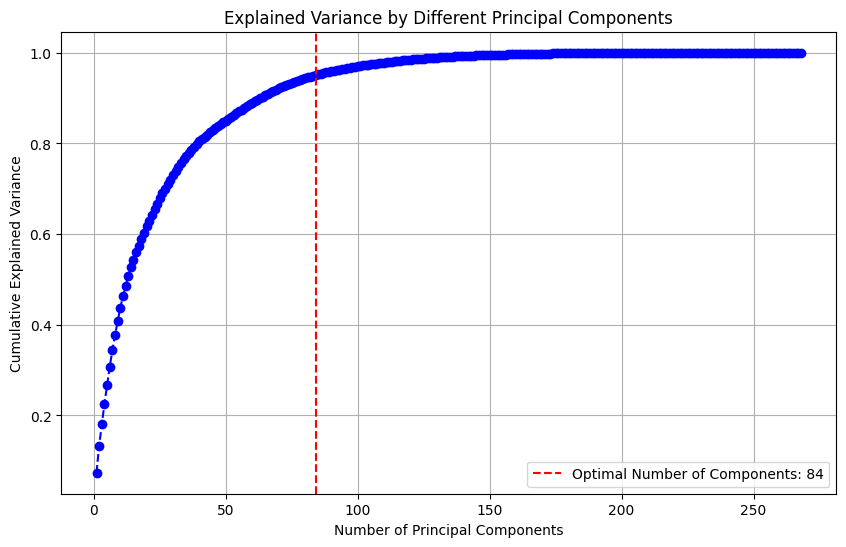

Principal Component 1: 0.0736 (Cumulative: 0.0736)
Principal Component 2: 0.0599 (Cumulative: 0.1336)
Principal Component 3: 0.0466 (Cumulative: 0.1801)
Principal Component 4: 0.0452 (Cumulative: 0.2253)
Principal Component 5: 0.0409 (Cumulative: 0.2662)
Principal Component 6: 0.0400 (Cumulative: 0.3063)
Principal Component 7: 0.0375 (Cumulative: 0.3438)
Principal Component 8: 0.0326 (Cumulative: 0.3764)
Principal Component 9: 0.0309 (Cumulative: 0.4073)
Principal Component 10: 0.0298 (Cumulative: 0.4372)
Principal Component 11: 0.0256 (Cumulative: 0.4627)
Principal Component 12: 0.0228 (Cumulative: 0.4856)
Principal Component 13: 0.0222 (Cumulative: 0.5077)
Principal Component 14: 0.0186 (Cumulative: 0.5264)
Principal Component 15: 0.0169 (Cumulative: 0.5432)
Principal Component 16: 0.0163 (Cumulative: 0.5596)
Principal Component 17: 0.0150 (Cumulative: 0.5745)
Principal Component 18: 0.0143 (Cumulative: 0.5889)
Principal Component 19: 0.0142 (Cumulative: 0.6031)
Principal Component 2

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sqlalchemy as sa
import pyodbc
import warnings
import urllib
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

path = "./Classes"
os.chdir(path)

from HYPERTUNNER import ModelOptimizer
from DATAPREPROCESSOR import DataPreprocessor
from MODEL_FEATURE_EVALUATOR import ModelEvaluator, FeatureImportance

iterations = 200

################### GET PAYMENT DATA ##########################

path = "../../1. Data/Cleaned Transaction Data"
os.chdir(path)

df = pd.read_excel('PreeProcessed_Psd2.xlsx')

df = df.drop(columns=['ReceivedDate', 'AccountNumber', 'ApplicationID', 'SSN', 'DisbursedDate', 'Amount', 'IsMainApplicant', 'ApplicantNo', 'NR', '_merge'])

base = df.drop(columns=['HasCoapp'])

# Assuming DataPreprocessor is predefined
preprocessor = DataPreprocessor(base)
(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled = preprocessor.get_split_data_with_upsample_and_scaling(0.7, upsample=False)

# Combine training and test data to perform PCA
X_all = np.vstack((Xtrain, Xtest))

# Standardizing the data
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Applying PCA
pca = PCA()
X_all_pca = pca.fit_transform(X_all_scaled)

# Plotting the explained variance to determine the number of components
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Finding the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1  # 95% variance threshold
plt.axvline(optimal_components, color='r', linestyle='--', label=f'Optimal Number of Components: {optimal_components}')
plt.legend()
plt.show()

# Optional: Print the explained variance for each component
for i, ev in enumerate(explained_variance, start=1):
    print(f'Principal Component {i}: {ev:.4f} (Cumulative: {cumulative_explained_variance[i-1]:.4f})')

# Integrate PCA into a pipeline for the ML model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=optimal_components)),
    # Add your model here, e.g., a random forest classifier
    # ('model', RandomForestClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(Xtrain, Ytrain)

# Transform the test data
Xtest_transformed = pipeline.transform(Xtest)

# Now, you can use the transformed data for further model training or evaluation
# For example, you can evaluate your model
# model_evaluator = ModelEvaluator(pipeline)
# model_evaluator.evaluate(Xtest_transformed, Ytest)


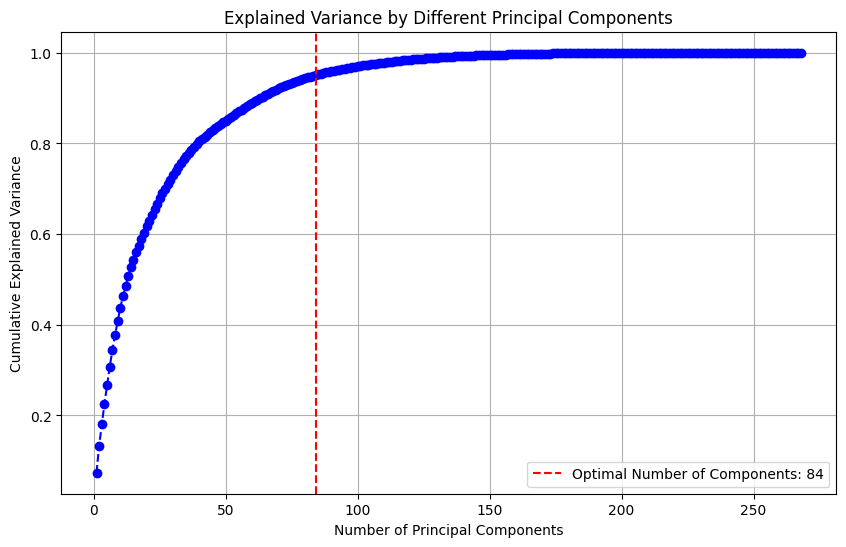

[I 2024-05-27 16:08:42,223] A new study created in memory with name: no-name-5c17b197-3d3b-4207-b0a4-4b51d033b076
[I 2024-05-27 16:08:42,225] A new study created in memory with name: no-name-be20ff2e-2a6b-49f8-a0c9-84d11c9905b7
[I 2024-05-27 16:08:42,227] A new study created in memory with name: no-name-e392495b-a303-4d10-9793-37feff2cc62a
[I 2024-05-27 16:08:42,227] A new study created in memory with name: no-name-3179bc90-a420-4e28-b315-9786e8922805


Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


[I 2024-05-27 16:08:42,761] Trial 0 finished with value: -0.09752137432443941 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: -0.09752137432443941.
[I 2024-05-27 16:08:43,123] Trial 1 finished with value: 0.1054991951965858 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.0016786149318516708, 'binarize': 0.027577641046909535}. Best is trial 1 with value: 0.1054991951965858.
[I 2024-05-27 16:08:43,290] Trial 2 finished with value: -0.09924198935183166 and parameters: {'nb_type': 'gaussian'}. Best is trial 1 with value: 0.1054991951965858.
[I 2024-05-27 16:08:43,427] Trial 3 finished with value: 0.11855619393109078 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.17673237195696692, 'binarize': 0.0018560928567787293}. Best is trial 3 with value: 0.11855619393109078.
[I 2024-05-27 16:08:43,467] Trial 4 finished with value: -0.0998886300010774 and parameters: {'nb_type': 'gaussian'}. Best is trial 3 with value: 0.11855619393109078.
[I 2024-05-27 16:08:43,514] Tria

Best parameters: {'naive_bayes': {'alpha': 0.0026037897869832377, 'binarize': 0.0012684093421906361}, 'xgboost': {'n_estimators': 32, 'max_depth': 9, 'learning_rate': 0.29391694674808705}, 'random_forest': {'n_estimators': 33, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3}, 'logistic_regression': {'C': 0.07297890114652204, 'solver': 'liblinear', 'penalty_liblinear': 'l2'}}


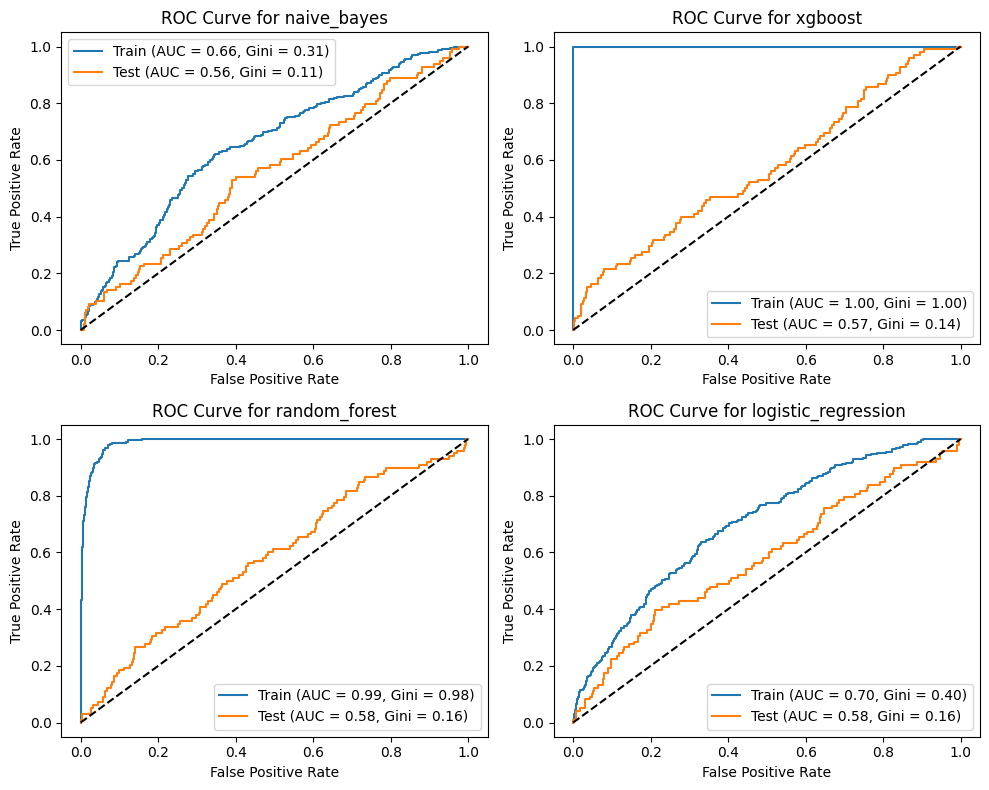

Available steps in pipeline: {'upsample': SMOTE(), 'model': RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=33)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': LogisticRegression(C=0.07297890114652204, max_iter=10000, solver='liblinear')}
Available steps in pipeline: {'upsample': SMOTE(), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.29391694674808705, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, mis

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sqlalchemy as sa
import pyodbc
import warnings
import urllib
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

path = "./Classes"
os.chdir(path)

from HYPERTUNNER import ModelOptimizer
from DATAPREPROCESSOR import DataPreprocessor
from MODEL_FEATURE_EVALUATOR import ModelEvaluator, FeatureImportance

iterations = 100  # Increased iterations for better hyperparameter tuning

################### GET PAYMENT DATA ##########################

path = "../../1. Data/Cleaned Transaction Data"
os.chdir(path)

df = pd.read_excel('PreeProcessed_Psd2.xlsx')

df = df.drop(columns=['ReceivedDate', 'AccountNumber', 'ApplicationID', 'SSN', 'DisbursedDate', 'Amount', 'IsMainApplicant', 'ApplicantNo', 'NR', '_merge'])

base = df.drop(columns=['HasCoapp'])

# Separate features and target
X = base.drop(columns=['Ever90'])
y = base['Ever90']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the explained variance to determine the number of components
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Finding the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1  # 95% variance threshold
plt.axvline(optimal_components, color='r', linestyle='--', label=f'Optimal Number of Components: {optimal_components}')
plt.legend()
plt.show()

# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Combine the PCA-transformed features with the target for further processing
X_pca_df = pd.DataFrame(X_pca_optimal)
X_pca_df['Ever90'] = y.values

# Assuming DataPreprocessor is predefined and can handle the transformed data
preprocessor = DataPreprocessor(X_pca_df)

(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled = preprocessor.get_split_data_with_upsample_and_scaling(0.7, upsample=False)

models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']

optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=iterations, early_stopping_rounds=10)
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

evaluator = ModelEvaluator(Xtrain, Ytrain, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()

feature_importance = FeatureImportance(train_upsampled, best_models, X_pca_df.drop(columns=['Ever90']), run_correlation_cluster=True)
feature_importance.calculate_importances()
feature_importance.calculate_cumulative_importance()
features_to_keep, features_to_discard = feature_importance.find_highly_correlated_features()


## SAME BUT TSNE INSTEAD

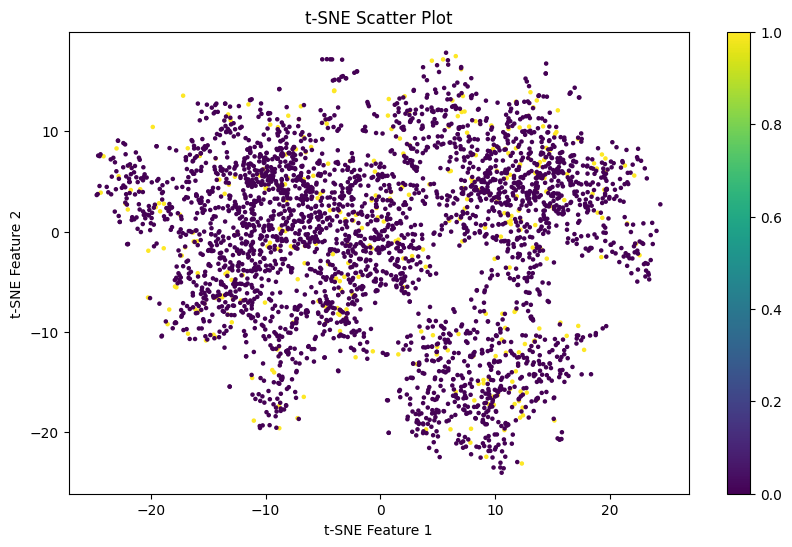

[I 2024-05-27 16:17:04,413] A new study created in memory with name: no-name-8d3a74ab-78cd-4940-9550-b6c4ff8cc30f
[I 2024-05-27 16:17:04,414] A new study created in memory with name: no-name-85e0b237-bbf5-4bc1-a4d5-e675bf4caddb
[I 2024-05-27 16:17:04,414] A new study created in memory with name: no-name-ef845b6c-bd6d-4f82-ac2a-7f4a5694438d
[I 2024-05-27 16:17:04,414] A new study created in memory with name: no-name-96e27736-7853-47ce-9d0c-93074dd203f8
[I 2024-05-27 16:17:04,464] Trial 0 finished with value: 0.027986254826006512 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: 0.027986254826006512.
[I 2024-05-27 16:17:04,468] Trial 0 finished with value: 0.0 and parameters: {'C': 0.00495682544182036, 'solver': 'liblinear', 'penalty_liblinear': 'l1'}. Best is trial 0 with value: 0.0.
[I 2024-05-27 16:17:04,495] Trial 1 finished with value: 0.0511875955754304 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.6692618855799374, 'binarize': 0.0018072458148573306}. Best 

Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


[I 2024-05-27 16:17:04,612] Trial 3 finished with value: 0.09518478318547781 and parameters: {'C': 0.0015741104400848736, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.09518478318547781.
[I 2024-05-27 16:17:04,621] Trial 5 finished with value: 0.08770875442802677 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.0025800340502453133, 'binarize': 0.7003915081191354}. Best is trial 5 with value: 0.08770875442802677.
[I 2024-05-27 16:17:04,647] Trial 4 finished with value: 0.09574703605615771 and parameters: {'C': 17.680186408625875, 'solver': 'liblinear', 'penalty_liblinear': 'l2'}. Best is trial 4 with value: 0.09574703605615771.
[I 2024-05-27 16:17:04,657] Trial 6 finished with value: 0.02666443154829386 and parameters: {'nb_type': 'gaussian'}. Best is trial 5 with value: 0.08770875442802677.
[I 2024-05-27 16:17:04,690] Trial 5 finished with value: 0.07265580302657544 and parameters: {'C': 8.689697792450717, 'solver': 'saga', 'penalty_saga': None}. Best is trial 4 with value: 0.09

Best parameters: {'naive_bayes': {'alpha': 0.0012067280767953494, 'binarize': 0.7619154905693443}, 'xgboost': {'n_estimators': 31, 'max_depth': 4, 'learning_rate': 0.08470403648646994}, 'random_forest': {'n_estimators': 29, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 4}, 'logistic_regression': {'C': 17.680186408625875, 'solver': 'liblinear', 'penalty_liblinear': 'l2'}}


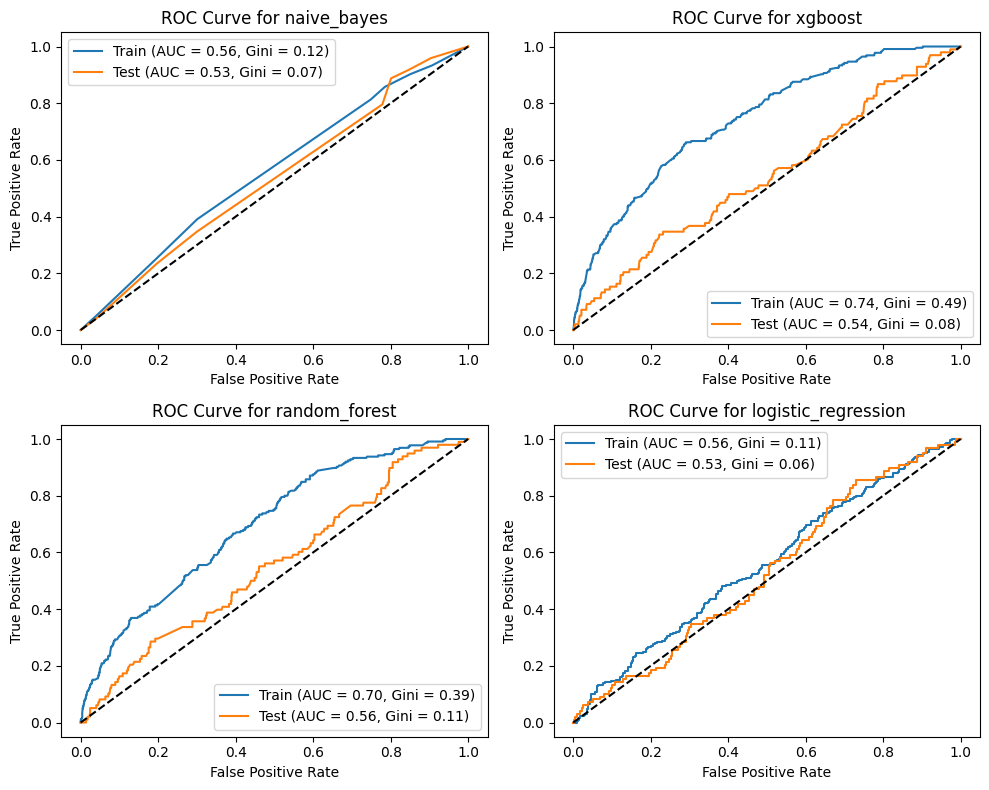

Available steps in pipeline: {'upsample': SMOTE(), 'model': RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=29)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': LogisticRegression(C=17.680186408625875, max_iter=10000, solver='liblinear')}
Available steps in pipeline: {'upsample': SMOTE(), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08470403648646994, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, miss

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sqlalchemy as sa
import pyodbc
import warnings
import urllib
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Separate features and target
X = base.drop(columns=['Ever90'])
y = base['Ever90']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot of t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
plt.colorbar()
plt.title('t-SNE Scatter Plot')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

# Combine the t-SNE-transformed features with the target for further processing
X_tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
X_tsne_df['Ever90'] = y.values

# Assuming DataPreprocessor is predefined and can handle the transformed data
preprocessor = DataPreprocessor(X_tsne_df)

(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled = preprocessor.get_split_data_with_upsample_and_scaling(0.7, upsample=False)

models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']

optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=iterations, early_stopping_rounds=10)
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

evaluator = ModelEvaluator(Xtrain, Ytrain, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()

feature_importance = FeatureImportance(train_upsampled, best_models, X_tsne_df.drop(columns=['Ever90']), run_correlation_cluster=True)
feature_importance.calculate_importances()
feature_importance.calculate_cumulative_importance()
features_to_keep, features_to_discard = feature_importance.find_highly_correlated_features()